In [1]:
from selenium import webdriver
import time
from PIL import Image
driver = webdriver.Chrome('C:\\Users\\USER\Desktop\\test\\chromedriver.exe')

driver.implicitly_wait(60)
driver.get('http://irs.thsrc.com.tw/IMINT/')
driver.find_element_by_id('btn-confirm').click()
time.sleep(3)
driver.save_screenshot('test.png')


element = driver.find_element_by_id('BookingS1Form_homeCaptcha_passCode')

left = element.location['x']
right = element.location['x'] + element.size['width']
top = element.location['y']
bottom = element.location['y'] + element.size['height']

img = Image.open('test.png')
# img.show()
img = img.crop((left, top, right, bottom))

img.save('captua.png', 'png')


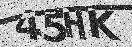

In [2]:
# import cv2
import requests
from PIL import Image
Image.open('captua.png')

In [3]:
import cv2
img = cv2.imread('captua.png')

In [4]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 30, 30 , 7 , 21)

In [5]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)

In [6]:
ret,thresh = cv2.threshold(dst,127,255,cv2.THRESH_BINARY_INV)

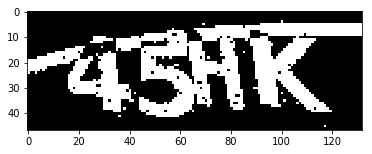

In [7]:
plt.imshow(thresh)
plt.show()

In [8]:
imgarr = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

In [9]:
imgarr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
imgarr.shape

(47, 132)

In [11]:
imgarr[:,5:130] = 0

In [12]:
imgarr.shape

(47, 132)

In [13]:
imgarr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
import numpy as np
from sklearn.preprocessing import binarize
imagedata = np.where(imgarr == 255)

In [15]:
imagedata

(array([ 5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 18, 19, 19, 19, 19, 19, 20,
        20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23,
        23, 23, 24, 24]),
 array([130, 131, 130, 131, 130, 131, 130, 131, 130, 131,   4,   0,   1,
          2,   3,   4,   0,   1,   2,   3,   4,   0,   1,   2,   3,   4,
          0,   1,   2,   3,   4,   0,   1,   2,   3,   4,   0,   3]))

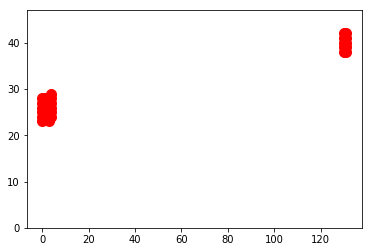

In [16]:
import matplotlib.pyplot as plt
plt.scatter(imagedata[1], 47 - imagedata[0], s = 100, c = 'red', label = 'Cluster 1')
plt.ylim(ymin=0)  
plt.ylim(ymax=47) 
plt.show()

In [17]:
X = np.array([imagedata[1]])
Y = 47 - imagedata[0]

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X.T)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
X2 = np.array([[i for i in range(0,119)]])
X2

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118]])

In [20]:
X2_ = poly_reg.fit_transform(X2.T)

Populating the interactive namespace from numpy and matplotlib


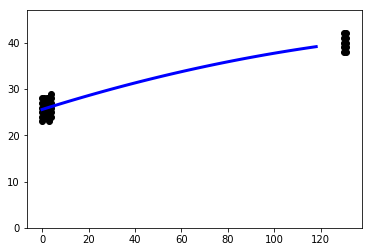

In [21]:
%pylab inline
plt.scatter(X,Y, color="black")
plt.ylim(ymin=0)
plt.ylim(ymax=47)
plt.plot(X2.T, regr.predict(X2_), color= "blue", linewidth = 3)

In [22]:
print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )

Coefficient:[ 0.          0.15810754 -0.00036444]
Intercept:25.5733530323


In [23]:
newimg =  cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

In [24]:
for ele in np.column_stack([regr.predict(X2_).round(0),X2[0],] ):
    pos = 47-int(ele[0])
    #if newimg[pos-4:pos+4,int(ele[1])] == 255:
    #newimg[pos-3:pos+3,int(ele[1])] = 0 
    newimg[pos-3:pos+3,int(ele[1])] = 255 - newimg[pos-3:pos+3,int(ele[1])]

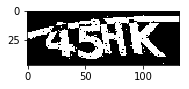

In [25]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(thresh)

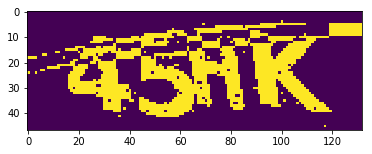

In [26]:
#plt.subplot(122)
plt.imshow(newimg)
plt.savefig('{}.png'.format('canCut'))

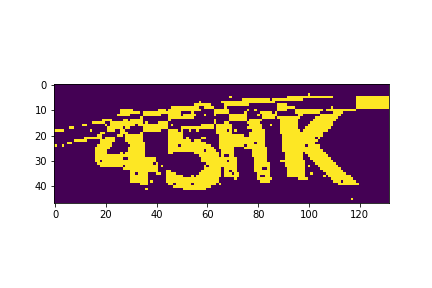

In [27]:
import cv2
import requests
# pip install --upgrade pillow


# with open ('kaptch.jpg', 'wb') as f:
#     res = requests.get('http://gcis.nat.gov.tw/pub/kaptch.jpg')
#     f.write(res.content)
from PIL import Image
#image = Image.open('C:\\Users\\USER\\Desktop\\test\\captua1.png')
image = Image.open('canCut.png')
image

In [28]:
import PIL
import numpy
pil_image = PIL.Image.open('canCut.png').convert('RGB')
#pil_image = PIL.Image.open('C:\\Users\\USER\\Desktop\\test\\captua1.png').convert('RGB')
open_cv_image = numpy.array(pil_image)

Populating the interactive namespace from numpy and matplotlib


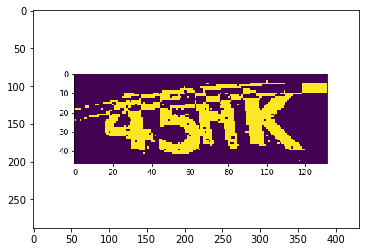

In [29]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [30]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key = lambda x:x[1])

In [31]:
ary =[]
for (c,_) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print((x, y, w, h))
    if w >= 20 and w <= 90 and h >=60 and h<=120:
    #if w >=15 and h >10:
        ary.append((x, y, w, h))

(1, 1, 430, 286)
(34, 181, 9, 10)
(35, 163, 5, 3)
(35, 156, 6, 7)
(35, 136, 6, 5)
(35, 131, 5, 3)
(35, 105, 6, 10)
(36, 183, 3, 3)
(37, 135, 3, 3)
(38, 162, 3, 3)
(38, 132, 3, 5)
(40, 157, 3, 8)
(40, 132, 3, 8)
(40, 106, 3, 8)
(41, 187, 5, 4)
(41, 181, 5, 4)
(41, 162, 5, 4)
(41, 156, 5, 4)
(41, 138, 5, 3)
(41, 131, 5, 3)
(41, 112, 5, 3)
(41, 105, 5, 3)
(41, 81, 3, 8)
(42, 87, 4, 3)
(42, 80, 4, 3)
(44, 183, 3, 6)
(44, 158, 3, 6)
(44, 132, 3, 8)
(44, 106, 3, 8)
(44, 86, 3, 3)
(44, 81, 3, 3)
(45, 83, 3, 4)
(51, 83, 340, 125)
(53, 210, 3, 8)
(54, 216, 4, 3)
(54, 209, 4, 3)
(55, 144, 2, 3)
(55, 129, 9, 3)
(56, 215, 3, 3)
(56, 210, 3, 3)
(57, 212, 3, 4)
(62, 144, 2, 3)
(67, 142, 5, 2)
(69, 126, 5, 3)
(74, 93, 315, 97)
(82, 124, 5, 2)
(90, 129, 2, 3)
(99, 159, 4, 4)
(100, 214, 6, 5)
(100, 209, 5, 3)
(102, 213, 3, 3)
(103, 210, 3, 5)
(104, 120, 7, 7)
(105, 210, 3, 8)
(106, 216, 5, 3)
(106, 209, 5, 3)
(109, 210, 3, 8)
(117, 109, 23, 7)
(122, 164, 4, 4)
(122, 156, 7, 5)
(122, 125, 4, 5)
(124, 12

In [32]:
print(ary)

[]


Populating the interactive namespace from numpy and matplotlib


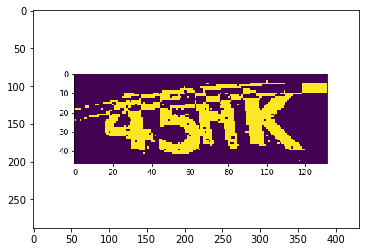

In [33]:
%pylab inline
plt.imshow(open_cv_image)

In [34]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x, y, w, h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

<Figure size 432x288 with 0 Axes>

In [35]:
from matplotlib import pyplot as plt
for id, (x, y, w, h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}.png'.format(id+1), dpi=100)
  